# Predicting the survival of Titanic passengers ( Classification Problem )

In [43]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv(r'C:\Users\kasm\Downloads\train (1).csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
df.shape

(891, 12)

In [45]:
df.dropna(axis=1,how='any').shape

(891, 9)

In [46]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [47]:
df.info()  #age, cabin embarked

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [48]:
df.drop('Cabin',axis=1,inplace=True)

In [49]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [50]:
df.Embarked.value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [51]:
from numpy import NaN,nan

In [52]:
df.loc[pd.isna(df['Embarked']),:].index

Int64Index([61, 829], dtype='int64')

In [53]:
df[df['Embarked'] != df['Embarked']]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [54]:
x=df['Embarked'] == df['Embarked']

In [55]:
df=df[x]

In [56]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [57]:
df.shape

(889, 11)

In [58]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

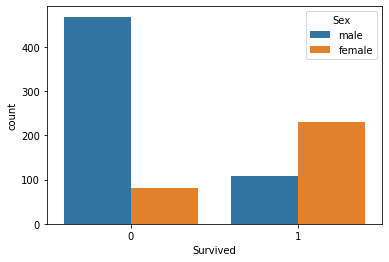

In [59]:
sns.countplot(x='Survived',hue='Sex',data=df)

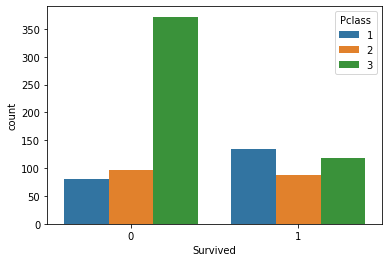

In [60]:
sns.countplot(x='Survived',hue='Pclass',data=df)

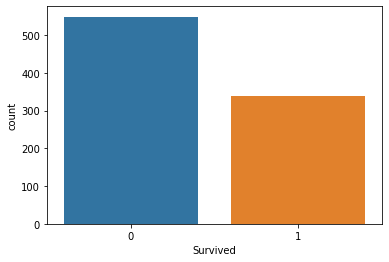

In [61]:
sns.countplot(df.Survived)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 54.,  46., 177., 169., 117.,  70.,  45.,  23.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

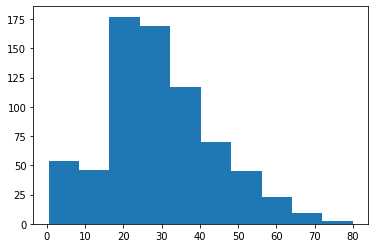

In [62]:
plt.hist(df.Age)

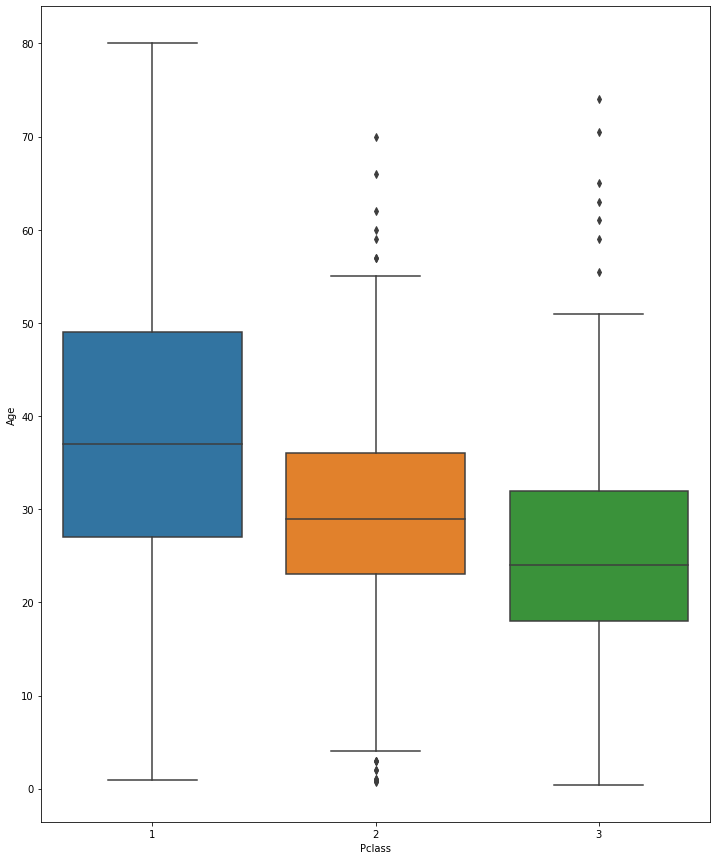

In [63]:
plt.figure(figsize=(12,15))
sns.boxplot(x='Pclass',y='Age',data=df)

In [64]:
o=df.loc[df.Pclass==1,['Age']]

In [65]:
o.mean()

Age    38.105543
dtype: float64

In [66]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 37
        elif Pclass ==2:
            return 29
        elif Pclass == 3:
            return 24
    else:
        return Age

In [67]:
df.Age=df[['Age','Pclass']].apply(impute_age,axis=1)

In [68]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [69]:
dfn=df._get_numeric_data()
nc=list(dfn)
dfc=df.drop(columns=nc)
cc=list(dfc)

In [70]:
dfc.head()

,Name,Sex,Ticket,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,S
4,"Allen, Mr. William Henry",male,373450,S


In [71]:
dfc.drop(columns=['Ticket','Name'],inplace=True)

In [72]:
dfc=pd.get_dummies(dfc,drop_first=True)

In [73]:
dfn.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


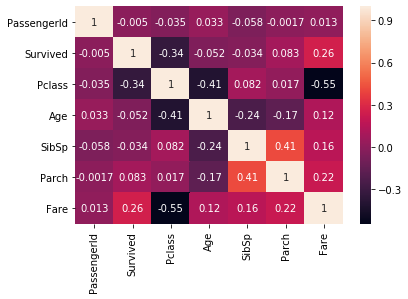

In [74]:
sns.heatmap(dfn.corr(),annot=True)

In [75]:
df=pd.concat([dfn,dfc],axis=1)

df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [76]:
#df.drop('Fare',axis=1,inplace=True)
#df.drop('PassengerId',axis=1,inplace=True)

In [88]:
# Preparing  pipeline for all the models
# Here LogisticRegression wins the race as its has highest accuracy...

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report


X = df.drop('Survived',axis=1) #.values.reshape(-1,1)
y = df.Survived

def model(X,y):
    models = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),KNeighborsClassifier(),SVC()]
    for model in models:
        X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        print(accuracy_score(y_test,y_pred) ,print(confusion_matrix(y_test,y_pred)) ,print(classification_report(y_test,y_pred)),type(model).__name__)

model(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[121  17]
 [ 18  67]]
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       138
           1       0.80      0.79      0.79        85

    accuracy                           0.84       223
   macro avg       0.83      0.83      0.83       223
weighted avg       0.84      0.84      0.84       223

0.8430493273542601 None None LogisticRegression
[[116  22]
 [ 25  60]]
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       138
           1       0.73      0.71      0.72        85

    accuracy                           0.79       223
   macro avg       0.78      0.77      0.78       223
weighted avg       0.79      0.79      0.79       223

0.7892376681614349 None None DecisionTreeClassifier


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[[122  16]
 [ 24  61]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       138
           1       0.79      0.72      0.75        85

    accuracy                           0.82       223
   macro avg       0.81      0.80      0.81       223
weighted avg       0.82      0.82      0.82       223

0.820627802690583 None None RandomForestClassifier
[[107  31]
 [ 48  37]]
              precision    recall  f1-score   support

           0       0.69      0.78      0.73       138
           1       0.54      0.44      0.48        85

    accuracy                           0.65       223
   macro avg       0.62      0.61      0.61       223
weighted avg       0.63      0.65      0.64       223

0.6457399103139013 None None KNeighborsClassifier


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[[135   3]
 [ 84   1]]
              precision    recall  f1-score   support

           0       0.62      0.98      0.76       138
           1       0.25      0.01      0.02        85

    accuracy                           0.61       223
   macro avg       0.43      0.50      0.39       223
weighted avg       0.48      0.61      0.48       223

0.6098654708520179 None None SVC


In [89]:
#from sklearn.metrics import confusion_matrix,classification_report
#confusion_matrix(y_test,predictions)

In [90]:
#print(classification_report(y_test,predictions))

# Since LogisticRegression wins the race lets built it:

In [95]:
# Logistic regression  :


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score

X = df.drop('Survived',axis=1) #.values.reshape(-1,1)
y = df.Survived

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)


lm = LogisticRegression(penalty='l2')
lm.fit(X_train,y_train)

predictions = lm.predict(X_test)

accuracy_score(y_test,predictions)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8352059925093633

In [96]:
lm.coef_

array([[ 2.47311408e-04, -7.09870322e-01, -2.66232641e-02,
        -2.20668752e-01, -4.14196478e-02,  4.79612695e-03,
        -2.17647035e+00, -1.74028569e-01, -4.50778246e-01]])

In [97]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,predictions)

0.8248240486699273

In [98]:
predictions

array([1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0], dtype=int64)

In [99]:
len(predictions)

267

In [ ]:
# Downloaded the data set from kaggle for competion..
# Lets Start...

In [100]:
df2=pd.read_csv(r'C:\Users\kasm\Downloads\test (1).csv')

In [101]:
df2.drop(columns=['Name','Cabin','Ticket'],inplace=True)

df2.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [102]:
df2.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

In [103]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 37
        elif Pclass ==2:
            return 29
        elif Pclass == 3:
            return 24
    else:
        return Age

In [104]:
df2.Age=df2[['Age','Pclass']].apply(impute_age,axis=1)

In [105]:
df2.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
dtype: int64

In [106]:
df2.shape

(418, 8)

In [107]:
df2.Pclass.value_counts()

3    218
1    107
2     93
Name: Pclass, dtype: int64

In [108]:
df2[df2['Fare'] != df2['Fare']]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
152,1044,3,male,60.5,0,0,NaN,S


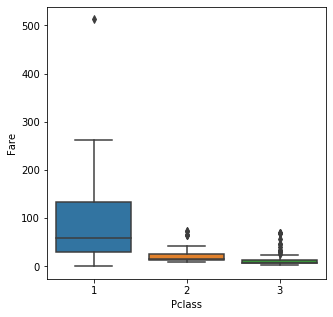

In [109]:
plt.figure(figsize=(5,5))
sns.boxplot(x='Pclass',y='Fare',data=df2)

In [110]:
d=df2.loc[df2.Pclass==3,['Fare']]

In [111]:
d.median()

Fare    7.8958
dtype: float64

In [112]:
df2.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [113]:
df2=df2.fillna(7.8958)

In [114]:
df2.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [115]:
df2n=df2._get_numeric_data()
nc2=list(df2n)
df2c=df2.drop(columns=nc2)
cc2=list(df2c)

In [116]:
df2c=pd.get_dummies(df2c,drop_first=True)

df2c.head()

,Sex_male,Embarked_Q,Embarked_S
0,1,1,0
1,0,0,1
2,1,1,0
3,1,0,1
4,0,0,1


In [117]:
df2=pd.concat([df2n,df2c],axis=1)

In [118]:
df2.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


In [119]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
Sex_male       418 non-null uint8
Embarked_Q     418 non-null uint8
Embarked_S     418 non-null uint8
dtypes: float64(2), int64(4), uint8(3)
memory usage: 20.9 KB


In [120]:
pred = lm.predict(df2)

In [121]:
pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [122]:
len(pred)

418

In [123]:
a=pd.Series(pred)

In [124]:
b=df2.PassengerId

In [125]:
final_df = pd.concat([b,a],axis=1)

In [126]:
final_df.head(10)

,PassengerId,0
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [127]:
final_df.rename(columns={0:'Survived'},inplace=True)

In [128]:
final_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [129]:
final_df.to_csv(r'C:\Users\kasm\Desktop\Predtitanic.csv',index=False)

In [130]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
PassengerId    418 non-null int64
Survived       418 non-null int64
dtypes: int64(2)
memory usage: 6.6 KB


In [33]:
# Now I submitted this predictions at kaggle competition..
# End...Happy Learning...:)